In [5]:
from enum import Enum
import numpy as np

In [2]:
class color(Enum):
    RED = 1
    GREEN = 2 
    YELLLOW = 3

In [4]:
color.RED

<color.RED: 1>

In [6]:
np.asarray([0,0,1,0],dtype=np.float32)

array([0., 0., 1., 0.], dtype=float32)

In [7]:
import socket

def get_ip():
    s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    s.settimeout(0)
    try:
        # doesn't even have to be reachable
        s.connect(('10.255.255.255', 1))
        IP = s.getsockname()[0]
    except Exception:
        IP = '127.0.0.1'
    finally:
        s.close()
    return IP

def create_socket_connection(start_port=5000):

    host=get_ip() # this computer's IP
    port = start_port
    s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    while port < min(start_port+1000,9999):
        try:
            s.bind((host,port))
            break
        except OSError as e:
            port+=1
    print(f"Connection Info - ip: {host}, port: {port}")
    return s

In [11]:
IP = get_ip()

In [12]:
s = create_socket_connection()

Connection Info - ip: 192.168.43.158, port: 5000


In [13]:
import numpy as np
import socket
import sys


def controller(s, momentum):
    try:
        s.settimeout(0.00001)
        data, addr = s.recvfrom(1024)
        if data:
            # Update momentum if data is received
            momentum = np.frombuffer(data)
    except:
        pass
    return momentum

if __name__ == "__main__":
    # Establish a socket connection
    s = create_socket_connection()

    # Initial momentum
    momentum = np.asarray([0, 0, 1, 0], dtype=np.float32)
    
    while True:
        # Continuously update momentum based on received data
        momentum = controller(s, momentum)
        
        # Print out the current momentum
        print("Current Momentum:", momentum)
        
        # Get user input from command line to change momentum
        user_input = input("Enter new momentum (comma-separated values): ")
        
        try:
            # Convert user input to numpy array
            new_momentum = np.array([float(x) for x in user_input.split(',')])
            # Update momentum with the new values
            momentum = new_momentum
        except ValueError:
            print("Invalid input. Momentum not changed.")

        # Add any other logic or commands you want to execute here


Connection Info - ip: 192.168.43.158, port: 5001
Current Momentum: [0. 0. 1. 0.]
Invalid input. Momentum not changed.
Current Momentum: [0. 0. 1. 0.]
Invalid input. Momentum not changed.
Current Momentum: [0. 0. 1. 0.]
Invalid input. Momentum not changed.
Current Momentum: [0. 0. 1. 0.]
Invalid input. Momentum not changed.
Current Momentum: [0. 0. 1. 0.]
Invalid input. Momentum not changed.
Current Momentum: [0. 0. 1. 0.]
Current Momentum: [0.1 0.2 0.3 0.4]
Invalid input. Momentum not changed.
Current Momentum: [0.1 0.2 0.3 0.4]
Invalid input. Momentum not changed.
Current Momentum: [0.1 0.2 0.3 0.4]
Invalid input. Momentum not changed.
Current Momentum: [0.1 0.2 0.3 0.4]
Invalid input. Momentum not changed.
Current Momentum: [0.1 0.2 0.3 0.4]
Invalid input. Momentum not changed.
Current Momentum: [0.1 0.2 0.3 0.4]


KeyboardInterrupt: Interrupted by user

In [14]:
np.linspace(0.0, 1.0, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [17]:
step_nodes = np.asfortranarray([
            [-1.0, -1.0, 1.0, 1.0],
            [-1.0, -1.0, 1.0, 1.0],
            [-15.0, -10, -10, -15.0],
        ])

type(step_nodes)

numpy.ndarray

In [6]:
import bezier
import numpy as np

s_vals = np.linspace(0.0, 1.0, 20)
step_nodes = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],
    [-1.0, -1.0, 1.0, 1.0],
    [-15.0, -10, -10, -15.0],
])
curve = bezier.Curve(step_nodes, degree=3)
step = curve.evaluate_multi(s_vals)

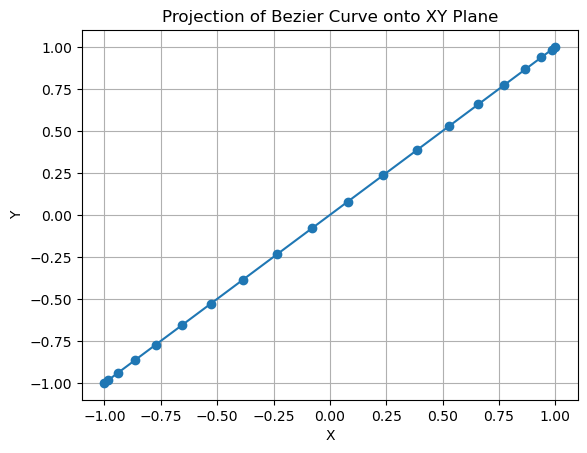

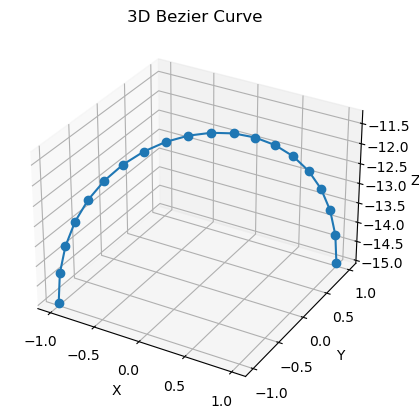

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z coordinates from the step array
x_coords = step[0]
y_coords = step[1]
z_coords = step[2]

# Create a 2D plot by projecting the curve onto the XY plane
plt.plot(x_coords, y_coords, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projection of Bezier Curve onto XY Plane')
plt.grid(True)
plt.show()

# Create a 3D plot of the Bezier curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_coords, y_coords, z_coords, marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Bezier Curve')
plt.show()


In [8]:
slide_nodes = np.asfortranarray([
    [1.0, -1.0],
    [1.0, -1.0],
    [-15.0, -15],
])
curve = bezier.Curve(slide_nodes, degree=1)
slide = curve.evaluate_multi(s_vals)    

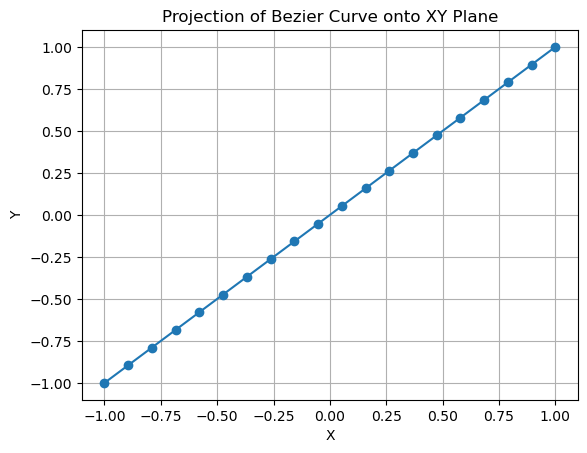

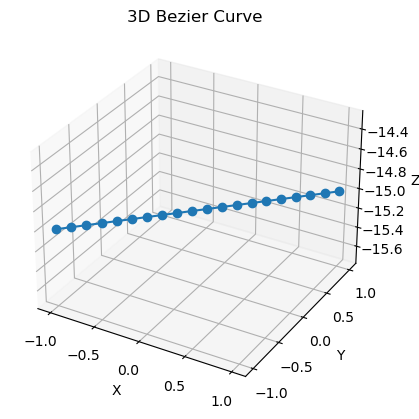

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z coordinates from the step array
x_coords = slide[0]
y_coords = slide[1]
z_coords = slide[2]

# Create a 2D plot by projecting the curve onto the XY plane
plt.plot(x_coords, y_coords, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projection of Bezier Curve onto XY Plane')
plt.grid(True)
plt.show()

# Create a 3D plot of the Bezier curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_coords, y_coords, z_coords, marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Bezier Curve')
plt.show()


In [15]:
motion = np.concatenate((step,slide), axis=1)
motion.shape

(3, 40)